In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
np.random.seed(1234)
num_of_obs= 100
x1= np.random.uniform(0,10,num_of_obs)
x2= np.random.uniform(0,10,num_of_obs)
const= np.ones(num_of_obs)
eps= np.random.normal(0,0.5, num_of_obs)

In [10]:
b = 1.4
theta_1 = 3
theta_2 = 5

# Generating the response variable y
y = b * const + theta_1 * x1 + theta_2 * x2 + eps

# Creating the design matrix X (100 rows, 3 columns)
X = np.array([const, x1, x2]).T  # Transposed to get shape (100, 3)


In [11]:
X


array([[1.        , 1.9151945 , 7.67116628],
       [1.        , 6.22108771, 7.08115362],
       [1.        , 4.37727739, 7.96867184],
       [1.        , 7.85358584, 5.57760828],
       [1.        , 7.79975808, 9.65836532],
       [1.        , 2.72592605, 1.471569  ],
       [1.        , 2.76464255, 0.29647001],
       [1.        , 8.01872178, 5.93893493],
       [1.        , 9.58139354, 1.14065699],
       [1.        , 8.75932635, 9.5080985 ],
       [1.        , 3.5781727 , 3.25707414],
       [1.        , 5.00995126, 1.9361869 ],
       [1.        , 6.83462935, 4.57811649],
       [1.        , 7.12702027, 9.20402571],
       [1.        , 3.70250755, 8.79069162],
       [1.        , 5.61196186, 2.52615755],
       [1.        , 5.03083165, 3.48008793],
       [1.        , 0.1376845 , 1.82588732],
       [1.        , 7.72826622, 9.01796051],
       [1.        , 8.82641191, 7.06528163],
       [1.        , 3.64885984, 7.26658462],
       [1.        , 6.15396178, 9.00087837],
       [1.

In [17]:
##solve using sklearn

from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression(fit_intercept=False)  # already have const in X
model.fit(X, y)

# Coefficients
print("Estimated coefficients (sklearn):", model.coef_)


Estimated coefficients (sklearn): [1.39004618 2.99675416 5.01156315]


In [18]:
##solve using matrix algebra

# Normal Equation: β̂ = (XᵀX)⁻¹Xᵀy
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print("Estimated coefficients (Matrix Algebra):", beta_hat)

Estimated coefficients (Matrix Algebra): [1.39004618 2.99675416 5.01156315]


In [19]:
print("True coefficients:                ", [b, theta_1, theta_2])


True coefficients:                 [1.4, 3, 5]


In [22]:
##Gradient descent
learning_rate = 1e-3
num_iteration = 10000
theta_initial = np.array([3,3,3])

In [24]:
def gradient_descent(learning_rate, num_iteration, theta_initial):
    theta = theta_initial.copy()
    theta_path = np.zeros((num_iteration + 1, 3))
    theta_path[0, :] = theta
    loss_vec = np.zeros(num_iteration)
    
    for i in range(num_iteration):
        y_pred = X @ theta
        error = y - y_pred
        loss_vec[i] = np.sum(error ** 2)
        
        # Gradient of MSE: -2 * X.T @ (y - y_pred)
        grad_vec = -2 * X.T @ error
        theta -= learning_rate * grad_vec

        theta_path[i + 1, :] = theta

    return theta, theta_path, loss_vec


In [25]:
theta_init = np.array([0.0, 0.0, 0.0])
theta_gd, path_gd, loss_gd = gradient_descent(learning_rate=1e-4, num_iteration=100, theta_initial=theta_init)


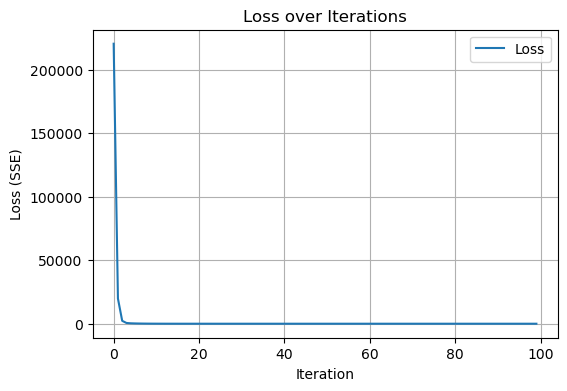

In [26]:
plt.figure(figsize=(6,4))
plt.plot(loss_gd, label='Loss')
plt.xlabel("Iteration")
plt.ylabel("Loss (SSE)")
plt.title("Loss over Iterations")
plt.grid(True)
plt.legend()
plt.show()


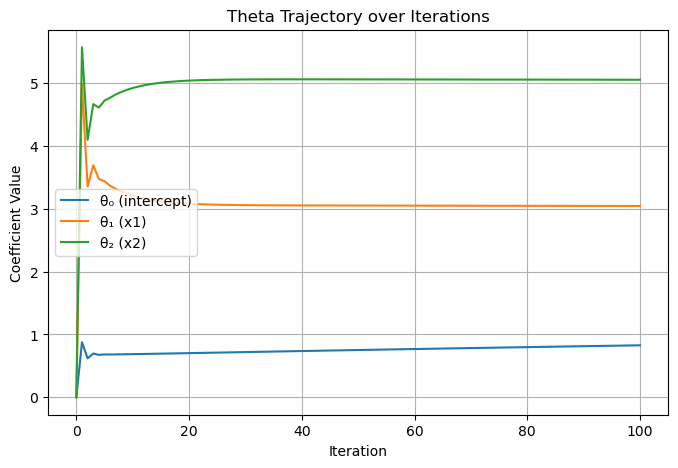

In [27]:
plt.figure(figsize=(8,5))
plt.plot(path_gd[:, 0], label='θ₀ (intercept)')
plt.plot(path_gd[:, 1], label='θ₁ (x1)')
plt.plot(path_gd[:, 2], label='θ₂ (x2)')
plt.xlabel("Iteration")
plt.ylabel("Coefficient Value")
plt.title("Theta Trajectory over Iterations")
plt.grid(True)
plt.legend()
plt.show()


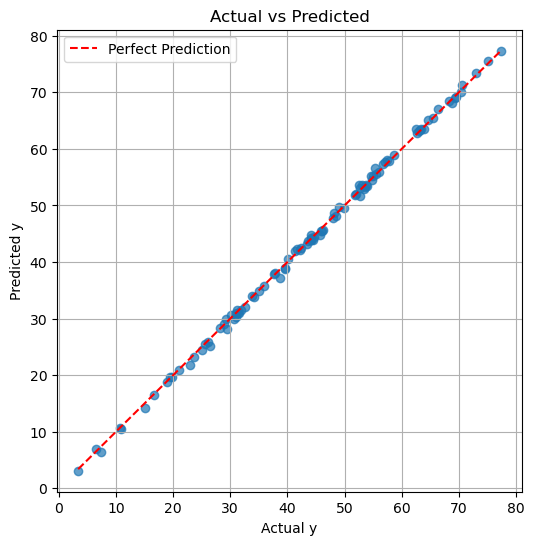

In [28]:
y_pred_final = X @ theta_gd

plt.figure(figsize=(6,6))
plt.scatter(y, y_pred_final, alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Prediction')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()
